# <html>

   

<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">

  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">



</div>

   

<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">

<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: NNDL </h1>



</div>

<div   style:"border: 3px solid green;text-align: center; ">

<h1 style="font-family: Georgia; color: black; text-align: center; ">Project5 - Question1 </h1>



</div>



   <div>    

<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Amanlou- sid:810100084 </h1>





</div>

   



</html>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import pandas as pd
import numpy as np
import zipfile
import os
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape

# # Load the European dataset
# file_path_european = "/kaggle/input/dataset/WindForecast_20240104-20240302.xls"
# raw_data_european = pd.read_excel(file_path_european)
# if 'DateTime' in raw_data_european.columns:
#     raw_data_european['DateTime'] = pd.to_datetime(raw_data_european['DateTime'],format="%d/%m/%Y %H:%M")
#     raw_data_european.set_index('DateTime', inplace=True)

# if 'Active Decremental Bids [yes/no]' in raw_data_european.columns:
#     label_encoder = LabelEncoder()
#     raw_data_european['Active Decremental Bids [yes/no]'] = label_encoder.fit_transform(raw_data_european['Active Decremental Bids [yes/no]'])

# european_features = raw_data_european.values
# raw_data_european_unscaled = raw_data_european.copy()

In [2]:
window_size = 144
prediction_size = 24
encoding_dim = 32

def create_sliding_windows(data, window_size, prediction_size):
    X, y = [], []
    for i in range(len(data) - window_size - prediction_size + 1):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size:i + window_size + prediction_size])
    return np.array(X), np.array(y)

# X_european, y_european = create_sliding_windows(european_features, window_size, prediction_size)
# print(f"the X_european shape is {X_european.shape} ")
# print(f"the y_european shape is {y_european.shape} ")

In [3]:
# zip_path = "/kaggle/input/dataset/J53_Data.zip"
# extracted_path = "/content/drive/My Drive/datasets/J53_data/"

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extracted_path)
extracted_path = ""
wt5_file_path = os.path.join(extracted_path, "/kaggle/input/dataset/J53_Data/Normalized_WT5.txt")
raw_data_wt5 = pd.read_csv(wt5_file_path, delimiter=" ", skipinitialspace=True)
raw_data_wt5.drop(columns=["Sequence No."] , inplace = True)
raw_data_wt5_unscaled = raw_data_wt5.copy()
wt5_features = raw_data_wt5.iloc[:, 1:].values
X_wt5, y_wt5 = create_sliding_windows(wt5_features, window_size, prediction_size)
print(f"the X_wt5 shape is {X_wt5.shape} ")
print(f"the y_wt5 shape is {y_wt5.shape} ")

the X_wt5 shape is (16276, 144, 7) 
the y_wt5 shape is (16276, 24, 7) 


In [4]:
# Replace NaN values in X_wt5 with column means
X_wt5 = np.where(np.isnan(X_wt5), np.nanmean(X_wt5, axis=0, keepdims=True), X_wt5)
y_wt5 = np.where(np.isnan(y_wt5), np.nanmean(y_wt5, axis=0, keepdims=True), y_wt5)

# Replace NaN values in X_european with column means
# X_european = np.where(np.isnan(X_european), np.nanmean(X_european, axis=0, keepdims=True), X_european)
# y_european = np.where(np.isnan(y_european), np.nanmean(y_european, axis=0, keepdims=True), y_european)


In [5]:
# Feb18len = int(len(X_european)*0.8)
# train_X_european = X_european[:Feb18len]
# train_y_european = y_european[:Feb18len]
# test_X_european = X_european[Feb18len:]
# test_y_european = y_european[Feb18len:]

Feb18len = int(len(X_wt5)*0.8)
train_X_wt5 = X_wt5[:Feb18len]
train_y_wt5 = y_wt5[:Feb18len]
test_X_wt5 = X_wt5[Feb18len:]
test_y_wt5 = y_wt5[Feb18len:]



In [6]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
min_max_scaler_european = MinMaxScaler(feature_range=(0, 1))
min_max_scaler_wt5 = MinMaxScaler(feature_range=(0, 1))

# Min-Max Scaling for European dataset
# train_shape = train_X_european.shape
# train_X_european_flat = train_X_european.reshape(-1, train_shape[2])
# test_X_european_flat = test_X_european.reshape(-1, train_shape[2])

# train_X_european_scaled = min_max_scaler_european.fit_transform(train_X_european_flat)
# test_X_european_scaled = min_max_scaler_european.transform(test_X_european_flat)

# train_X_european = train_X_european_scaled.reshape(train_shape)
# test_X_european = test_X_european_scaled.reshape(test_X_european.shape)

# Min-Max Scaling for WT5 dataset
train_shape = train_X_wt5.shape
train_X_wt5_flat = train_X_wt5.reshape(-1, train_shape[2])
test_X_wt5_flat = test_X_wt5.reshape(-1, train_shape[2])

train_X_wt5_scaled = min_max_scaler_wt5.fit_transform(train_X_wt5_flat)
test_X_wt5_scaled = min_max_scaler_wt5.transform(test_X_wt5_flat)

train_X_wt5 = train_X_wt5_scaled.reshape(train_shape)
test_X_wt5 = test_X_wt5_scaled.reshape(test_X_wt5.shape)

# Normalizing target values 
# train_y_european_scaled = min_max_scaler_european.transform(train_y_european.reshape(-1, train_y_european.shape[2]))
# test_y_european_scaled = min_max_scaler_european.transform(test_y_european.reshape(-1, test_y_european.shape[2]))
train_y_wt5_scaled = min_max_scaler_wt5.transform(train_y_wt5.reshape(-1, train_y_wt5.shape[2]))
test_y_wt5_scaled = min_max_scaler_wt5.transform(test_y_wt5.reshape(-1, test_y_wt5.shape[2]))

# train_y_european = train_y_european_scaled.reshape(train_y_european.shape)
# test_y_european = test_y_european_scaled.reshape(test_y_european.shape)
train_y_wt5 = train_y_wt5_scaled.reshape(train_y_wt5.shape)
test_y_wt5 = test_y_wt5_scaled.reshape(test_y_wt5.shape)


In [7]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
input_layer = Input(shape=(window_size, train_X_wt5.shape[2]), name="Input")
encoded = Dense(encoding_dim, activation='relu', name="Encoder_Layer")(Flatten()(input_layer))
decoded = Dense(prediction_size * train_X_wt5.shape[2], activation='sigmoid', name="Decoder_Layer")(encoded)
decoded = Reshape((prediction_size, train_X_wt5.shape[2]))(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded, name="Autoencoder")
encoder = Model(inputs=input_layer, outputs=encoded, name="Encoder")

autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])
autoencoder.summary()

Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 144, 7)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1008)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Encoder_Layer (Dense)                │ (None, 32)                  │          32,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Decoder_Layer (Dense)                │ (None, 168)                 │           5,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 24, 7)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,832 (147.78 KB)

 Trainable params: 37,832 (147.78 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# autoencoder.fit(train_X_european, train_y_european,
#                 epochs=50,
#                 batch_size=32,
#                 shuffle=True,
#                 validation_data=(test_X_european, test_y_european))

autoencoder.fit(train_X_wt5, train_y_wt5,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(test_X_wt5, test_y_wt5))

Epoch 1/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0450 - mae: 0.1590 - val_loss: 0.0232 - val_mae: 0.1069
Epoch 2/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0176 - mae: 0.0911 - val_loss: 0.0200 - val_mae: 0.0984
Epoch 3/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0154 - mae: 0.0827 - val_loss: 0.0166 - val_mae: 0.0873
Epoch 4/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0144 - mae: 0.0789 - val_loss: 0.0165 - val_mae: 0.0869
Epoch 5/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0136 - mae: 0.0760 - val_loss: 0.0177 - val_mae: 0.0894
Epoch 6/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0135 - mae: 0.0751 - val_loss: 0.0159 - val_mae: 0.0841
Epoch 7/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0129 - mae: 0.0730 - val_loss: 0.0150 - val_mae: 0.0805
Epoch 8/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0130 - mae: 0.0726 - val_loss: 0.0148 - val_mae: 0.0803
Epoch 9/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [9]:
# encoded_features_european = encoder.predict(test_X_european)
encoded_features_wt5 = encoder.predict(test_X_wt5)

# decoded_data_european = autoencoder.predict(test_X_european)
decoded_data_wt5 = autoencoder.predict(test_X_wt5)

# print("Encoded Features Shape (European):", encoded_features_european.shape)
# print("Decoded Data Shape (European):", decoded_data_european.shape)
print("Encoded Features Shape (WT5):", encoded_features_wt5.shape)
print("Decoded Data Shape (WT5):", decoded_data_wt5.shape)

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Encoded Features Shape (WT5): (3256, 32)
Decoded Data Shape (WT5): (3256, 24, 7)


In [10]:
def huber_loss(y_true, y_pred, delta=1.0):
    residual = tf.abs(y_true - y_pred)
    condition = tf.less(residual, delta)
    small_res = 0.5 * tf.square(residual)
    large_res = delta * residual - 0.5 * tf.square(delta)
    return tf.where(condition, small_res, large_res)

In [11]:
def slime_mould_optimization(obj_func, n_agents, n_iterations, dim, lb, ub):
    agents = np.random.uniform(lb, ub, (n_agents, dim))
    best_agent = None
    best_fitness = float('inf')

    for iteration in range(n_iterations):
        fitness = np.apply_along_axis(obj_func, 1, agents)

        sorted_indices = np.argsort(fitness)
        agents = agents[sorted_indices]
        fitness = fitness[sorted_indices]

        if fitness[0] < best_fitness:
            best_fitness = fitness[0]
            best_agent = agents[0].copy()

        W = np.tanh(fitness / (fitness + 1e-6))
        for i in range(n_agents):
            if np.random.rand() < W[i]:
                agents[i] += np.random.uniform(-1, 1, dim) * (best_agent - agents[i])
            else:
                agents[i] += np.random.uniform(-1, 1, dim)

        agents = np.clip(agents, lb, ub)

    return best_agent, best_fitness

In [12]:
def plot_timing_diagram(raw_data, train_data_length, label, title, outliers=None):
    indices = range(len(raw_data))
    plt.figure(figsize=(20, 6))
    plt.plot(indices[:train_data_length], raw_data[:train_data_length], label="Train", color="blue")
    plt.plot(indices[train_data_length:], raw_data[train_data_length:], label="Test", color="brown", linestyle="--")
    if outliers is not None:
        outlier_indices = np.where(outliers)[0]
        plt.scatter(outlier_indices, raw_data[outliers], color="orange", label="Outlier")
    plt.xlabel("Time (10 min)")
    plt.ylabel("Offshore wind power (%)")
    plt.title(title)
    plt.legend()
    plt.show()


In [13]:
def detect_outliers(data, window_size, raw_data):
    outliers = []
    for i in range(len(data)):
        start_idx = max(0, i - window_size // 2)
        end_idx = min(len(data), i + window_size // 2)
        window_data = raw_data[start_idx:end_idx]
        mean = np.mean(window_data)
        variance = np.var(window_data)
        if abs(raw_data[i] - mean) > np.sqrt(variance):
            outliers.append(True)
        else:
            outliers.append(False)
    return np.array(outliers)

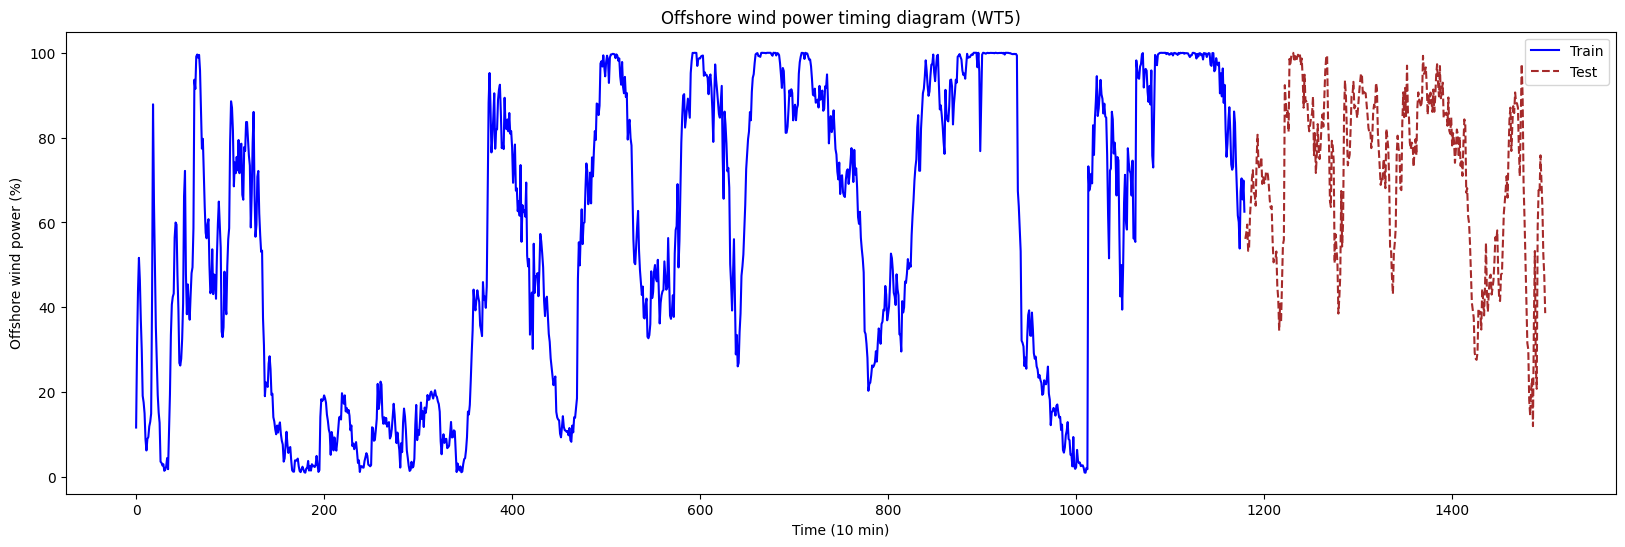

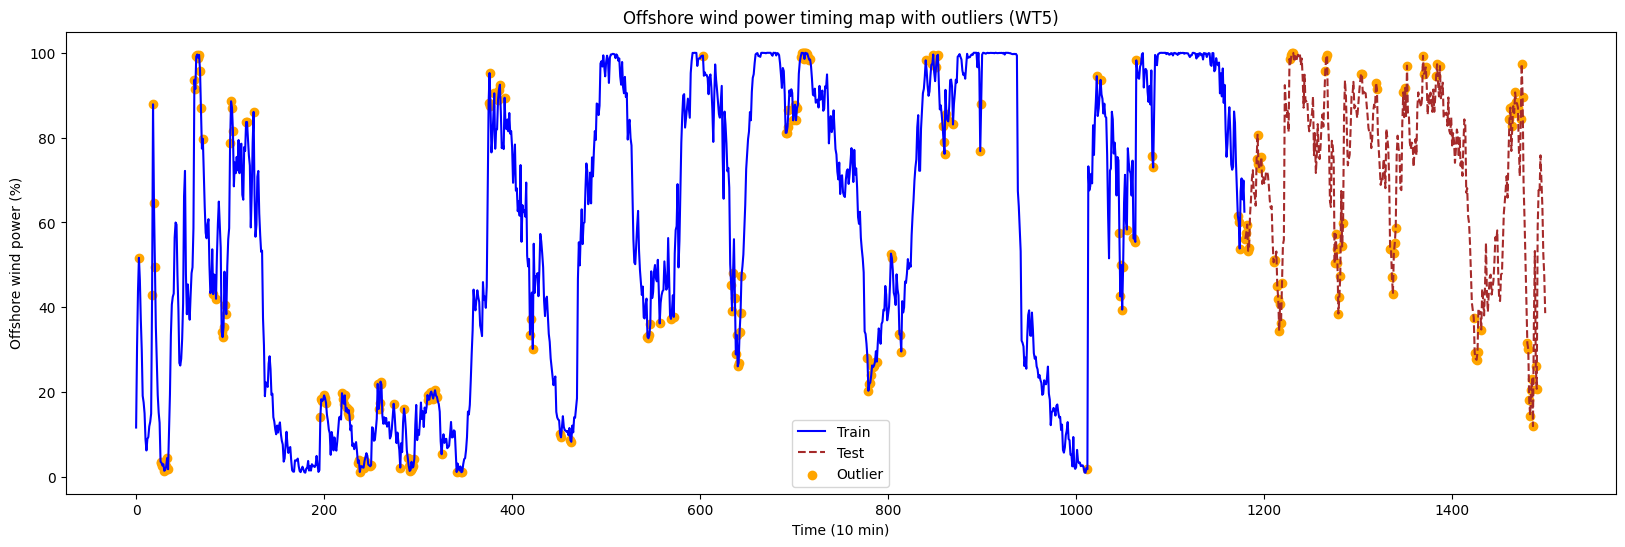

In [14]:
# raw_data_european_values = raw_data_european_unscaled.iloc[:len(X_european), -1].values
raw_data_wt5_values = raw_data_wt5_unscaled.iloc[:len(X_wt5), -1].values

# outliers_european = detect_outliers(X_european[:, :, -1], window_size=48, raw_data=raw_data_european_values)
outliers_wt5 = detect_outliers(X_wt5[:1500, :, -1], window_size=48, raw_data=raw_data_wt5_values[:1500])

# Plot timing diagrams
# plot_timing_diagram(raw_data_european_values, len(train_X_european), "European", "Offshore wind power timing diagram (European)")
plot_timing_diagram(raw_data_wt5_values[:1500], len(train_X_wt5[:1180]), "WT5", "Offshore wind power timing diagram (WT5)")
# plot_timing_diagram(raw_data_european_values, len(train_X_european), "European", "Offshore wind power timing map with outliers (European)", outliers=outliers_european)
plot_timing_diagram(raw_data_wt5_values[:1500], len(train_X_wt5[:1180]), "WT5", "Offshore wind power timing map with outliers (WT5)", outliers=outliers_wt5)


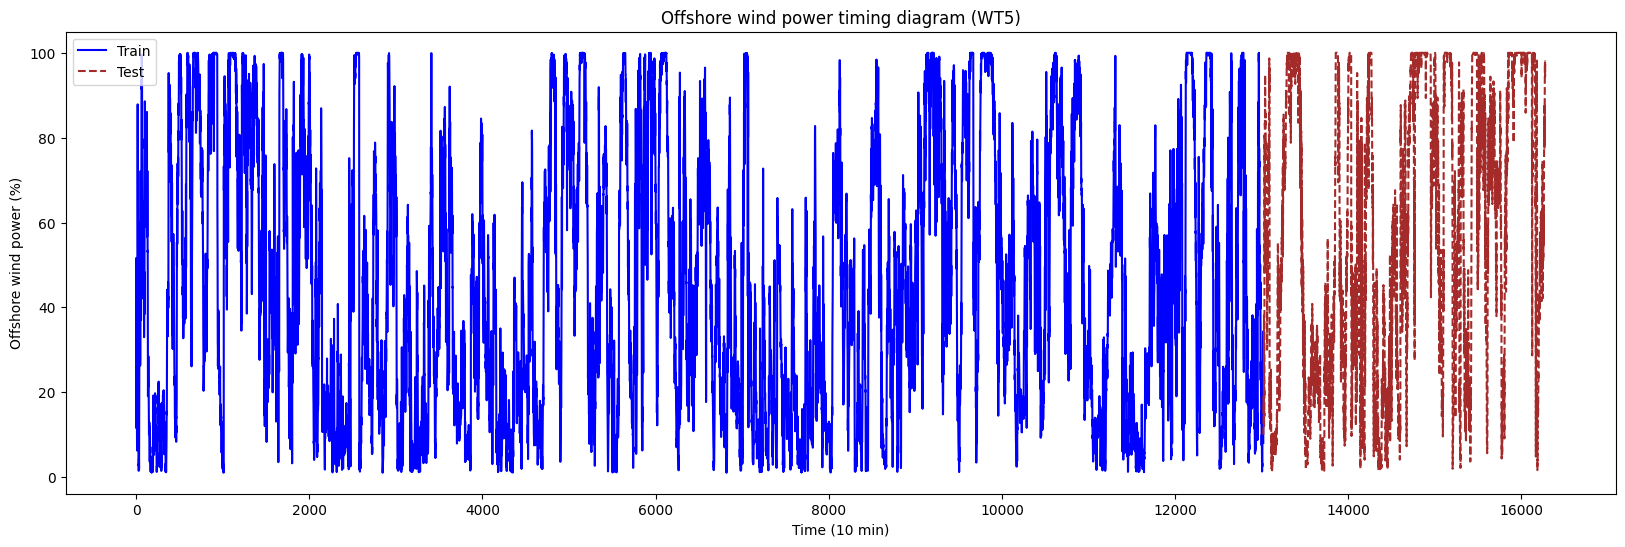

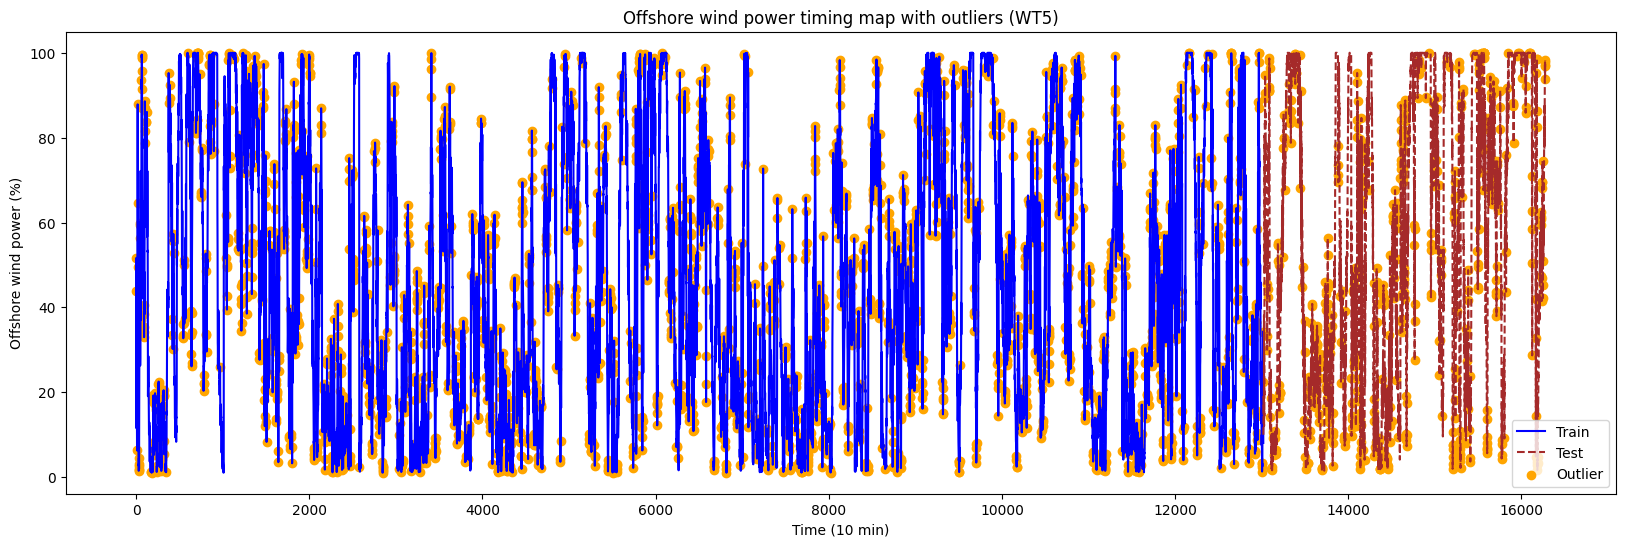

In [15]:
# raw_data_european_values = raw_data_european_unscaled.iloc[:len(X_european), -1].values
raw_data_wt5_values = raw_data_wt5_unscaled.iloc[:len(X_wt5), -1].values

# outliers_european = detect_outliers(X_european[:, :, -1], window_size=48, raw_data=raw_data_european_values)
outliers_wt5 = detect_outliers(X_wt5[:, :, -1], window_size=32, raw_data=raw_data_wt5_values[:])

# Plot timing diagrams
# plot_timing_diagram(raw_data_european_values, len(train_X_european), "European", "Offshore wind power timing diagram (European)")
plot_timing_diagram(raw_data_wt5_values[:], len(train_X_wt5[:]), "WT5", "Offshore wind power timing diagram (WT5)")
# plot_timing_diagram(raw_data_european_values, len(train_X_european), "European", "Offshore wind power timing map with outliers (European)", outliers=outliers_european)
plot_timing_diagram(raw_data_wt5_values[:], len(train_X_wt5[:]), "WT5", "Offshore wind power timing map with outliers (WT5)", outliers=outliers_wt5)


In [16]:
def denoise_and_plot(raw_data, denoised_data, train_length, title):
    plt.figure(figsize=(20, 6))
    plt.plot(raw_data, label="Actual", color="green", linewidth=0.5)
    plt.plot(range(0, len(raw_data)), denoised_data[0:], label="Denoised data", color="red", linestyle="--",linewidth=0.5)
    plt.xlabel("Time (10 min)")
    plt.ylabel("Offshore wind power (%)")
    plt.title(title)
    plt.legend()
    plt.show()

In [17]:
# Normalize the entire European dataset
# X_european = np.where(np.isnan(X_european), np.nanmean(X_european, axis=0, keepdims=True), X_european)
# european_min = X_european.min(axis=0, keepdims=True)
# european_max = X_european.max(axis=0, keepdims=True)
# european_range = european_max - european_min
# european_range[european_range == 0] = 1
# X_european_normalized = (X_european - european_min) / european_range

# Normalize the entire WT5 dataset
X_wt5 = np.where(np.isnan(X_wt5), np.nanmean(X_wt5, axis=0, keepdims=True), X_wt5)
wt5_min = X_wt5.min(axis=0, keepdims=True)
wt5_max = X_wt5.max(axis=0, keepdims=True)
wt5_range = wt5_max - wt5_min
wt5_range[wt5_range == 0] = 1
X_wt5_normalized = (X_wt5 - wt5_min) / wt5_range

509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
509/509 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


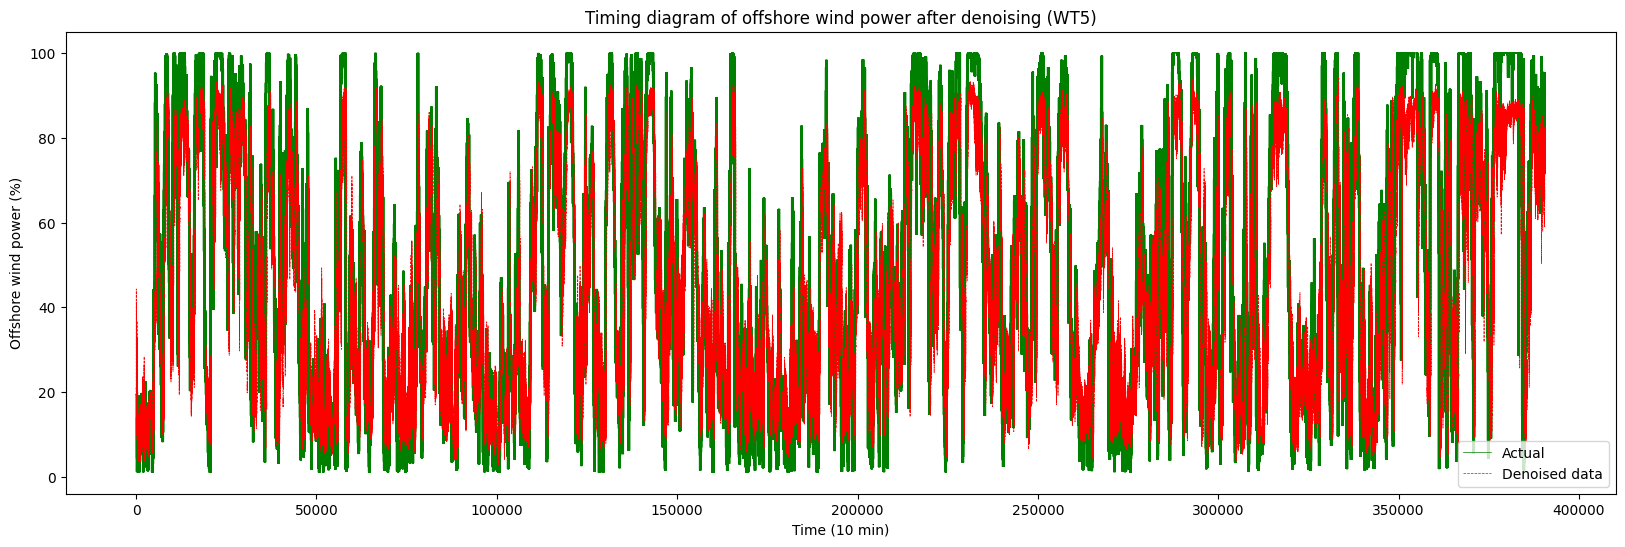

In [18]:
# X_european_normalized = np.expand_dims(X_european_normalized, axis=-1) if X_european_normalized.ndim == 2 else X_european_normalized
X_wt5_normalized = np.expand_dims(X_wt5_normalized, axis=-1) if X_wt5_normalized.ndim == 2 else X_wt5_normalized

# encoded_features_european = encoder.predict(X_european_normalized)
encoded_features_wt5 = encoder.predict(X_wt5_normalized)

# decoded_data_european = autoencoder.predict(X_european_normalized)
decoded_data_wt5 = autoencoder.predict(X_wt5_normalized)

# full_denoised_european = decoded_data_european[:, :, 0] * european_range[:, :prediction_size, 0] + european_min[:, :prediction_size, 0]
full_denoised_wt5 = decoded_data_wt5[:, :, -1] * wt5_range[:, :prediction_size, -1] + wt5_min[:, :prediction_size, -1]

# denoised_european = full_denoised_european.flatten()
denoised_wt5 = full_denoised_wt5.flatten()

# denoise_and_plot(y_european[:,:,-1].flatten(),denoised_european, len(y_european), "Timing diagram of offshore wind power after denoising (European)")
denoise_and_plot(y_wt5[:,:,-1].flatten(),denoised_wt5, len(y_wt5), "Timing diagram of offshore wind power after denoising (WT5)")


In [19]:
# Define and train MLP model
def build_mlp(input_shape):
    inputs = Input(shape=input_shape)
    x = Flatten()(inputs)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(1)(x)
    return Model(inputs, outputs)
    
def train_model_with_loss(model, train_X, train_y, test_X, test_y, loss_fn):
    model.compile(optimizer='adam', loss=loss_fn, metrics=['mae'])
    model.fit(train_X, train_y, epochs=50, batch_size=32, validation_data=(test_X, test_y))

In [20]:
prediction_size = 1
window_size = 24

train_X_wt5 = decoded_data_wt5[:int(len(decoded_data_wt5) * 0.8)]
test_X_wt5 = decoded_data_wt5[int(len(decoded_data_wt5) * 0.8):]
train_y_wt5 = decoded_data_wt5[:int(len(decoded_data_wt5) * 0.8)][:,:prediction_size,-1:]
test_y_wt5 = decoded_data_wt5[int(len(decoded_data_wt5) * 0.8):][:,:prediction_size,-1:]

In [21]:
# Train and evaluate MLP with MSE and Huber
mlp_model_mse_wt5 = build_mlp((window_size, train_X_wt5.shape[2]))
train_model_with_loss(mlp_model_mse_wt5, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, 'mse')

mlp_model_huber_wt5 = build_mlp((window_size, train_X_wt5.shape[2]))
train_model_with_loss(mlp_model_huber_wt5, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, huber_loss)


Epoch 1/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0042 - mae: 0.0346 - val_loss: 6.1391e-04 - val_mae: 0.0217
Epoch 2/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6297e-04 - mae: 0.0101 - val_loss: 6.8087e-05 - val_mae: 0.0061
Epoch 3/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7503e-05 - mae: 0.0059 - val_loss: 7.0411e-05 - val_mae: 0.0066
Epoch 4/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8816e-05 - mae: 0.0060 - val_loss: 3.0711e-05 - val_mae: 0.0041
Epoch 5/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.0380e-05 - mae: 0.0068 - val_loss: 4.2812e-05 - val_mae: 0.0048
Epoch 6/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.5894e-05 - mae: 0.0069 - val_loss: 1.6441e-04 - val_mae: 0.0118
Epoch 7/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.8234e-05 - mae: 0.0063 - val_loss: 5.5445e-05 - val_mae: 0.0065
Epoch 8/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4632e-05 - mae: 0.0047 - val_loss: 2.9511e-05 - val_mae: 0.0

In [22]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, SimpleRNN, LSTM, GRU, MultiHeadAttention, LayerNormalization, Dropout, Add
def build_rnn(input_shape):
    inputs = Input(shape=input_shape)
    x = SimpleRNN(64, activation='tanh', return_sequences=False)(inputs)
    outputs = Dense(prediction_size)(x)
    return Model(inputs, outputs)

# RNN with Huber
rnn_model_huber = build_rnn((window_size, train_X_wt5.shape[2]))
train_model_with_loss(rnn_model_huber, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, huber_loss)
# RNN with Huber
rnn_model_mse = build_rnn((window_size, train_X_wt5.shape[2]))
train_model_with_loss(rnn_model_mse, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, 'mse')

Epoch 1/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0110 - mae: 0.0911 - val_loss: 2.5824e-04 - val_mae: 0.0177
Epoch 2/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.2242e-04 - mae: 0.0162 - val_loss: 1.1587e-04 - val_mae: 0.0115
Epoch 3/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.7075e-05 - mae: 0.0107 - val_loss: 2.9217e-04 - val_mae: 0.0205
Epoch 4/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9.1708e-05 - mae: 0.0104 - val_loss: 7.3201e-05 - val_mae: 0.0098
Epoch 5/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5.4249e-05 - mae: 0.0082 - val_loss: 2.2395e-04 - val_mae: 0.0189
Epoch 6/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.3491e-05 - mae: 0.0108 - val_loss: 5.9066e-04 - val_mae: 0.0328
Epoch 7/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.8287e-04 - mae: 0.0131 - val_loss: 3.2571e-04 - val_mae: 0.0241
Epoch 8/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7.8939e-05 - mae: 0.0097 - val_loss: 1.6792e-04 - val_mae: 0.0

In [26]:
def build_transformer(input_shape, num_heads=6, key_dim=128, dropout_rate=0.1):
    inputs = Input(shape=input_shape)
    x = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(inputs, inputs)
    x = LayerNormalization()(x)
    x = Dropout(dropout_rate)(x)
    x = Flatten()(x)
    outputs = Dense(prediction_size)(x)
    return Model(inputs, outputs)

# Transformer with MSE
transformer_model_mse = build_transformer((window_size, train_X_wt5.shape[2]))
train_model_with_loss(transformer_model_mse, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, 'mse')

# Transformer with Huber
transformer_model_huber = build_transformer((window_size, train_X_wt5.shape[2]))
train_model_with_loss(transformer_model_huber, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, huber_loss)


Epoch 1/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.2356 - mae: 0.3658 - val_loss: 0.0068 - val_mae: 0.0682
Epoch 2/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0395 - mae: 0.1553 - val_loss: 0.0036 - val_mae: 0.0482
Epoch 3/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0131 - mae: 0.0903 - val_loss: 0.0033 - val_mae: 0.0448
Epoch 4/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0060 - mae: 0.0601 - val_loss: 0.0031 - val_mae: 0.0407
Epoch 5/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0037 - mae: 0.0468 - val_loss: 0.0014 - val_mae: 0.0272
Epoch 6/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0028 - mae: 0.0402 - val_loss: 0.0021 - val_mae: 0.0335
Epoch 7/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023 - mae: 0.0370 - val_loss: 0.0015 - val_mae: 0.0278
Epoch 8/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022 - mae: 0.0348 - val_loss: 0.0016 - val_mae: 0.0325
Epoch 9/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, mape, r2

# Function to denormalize data
def denormalize_data(data, min_val, range_val):
    return data * range_val + min_val

# Function to evaluate the model
def evaluate_model(model, test_X, test_y, min_val, range_val):
    # Predict using the model
    y_pred = model.predict(test_X)
    
    # Denormalize the predicted and actual values
    y_pred_denormalized = denormalize_data(y_pred, min_val, range_val).flatten()
    y_true_denormalized = denormalize_data(test_y, min_val, range_val).flatten()
    
    # Calculate metrics
    return calculate_metrics(y_true_denormalized, y_pred_denormalized)

In [27]:
metrics_mlp_mse = evaluate_model(mlp_model_mse_wt5,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])
metrics_mlp_huber = evaluate_model(mlp_model_huber_wt5,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])
metrics_rnn_mse = evaluate_model(rnn_model_mse,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])
metrics_rnn_huber = evaluate_model(rnn_model_huber,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])
metrics_transformer_mse = evaluate_model(transformer_model_mse,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])
metrics_transformer_huber = evaluate_model(transformer_model_huber,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])

metrics = {
    "MLP MSE": metrics_mlp_mse,
    "MLP Huber": metrics_mlp_huber,
    "RNN MSE": metrics_rnn_mse,
    "RNN Huber": metrics_rnn_huber,
    "Transformer MSE": metrics_transformer_mse,
    "Transformer Huber": metrics_transformer_huber,
}

organized_metrics = {
    "MAE": {},
    "MAPE": {},
    "RMSE": {},
    "R^2": {}
}

for model_name, metric_values in metrics.items():
    mae, rmse, mape, r2 = metric_values
    words = model_name.split()
    model = words[0]
    loss_fn = words[1]
    organized_metrics["MAE"].setdefault(model, {})[loss_fn] = mae
    organized_metrics["RMSE"].setdefault(model, {})[loss_fn] = rmse
    organized_metrics["MAPE"].setdefault(model, {})[loss_fn] = mape
    organized_metrics["R^2"].setdefault(model, {})[loss_fn] = r2

print(f"{'Metric':<12}{'Model':<12}{'Huber':<12}{'MSE':<12}")
print("=" * 50)

for metric, models in organized_metrics.items():
    for model, losses in models.items():
        huber_val = f"{losses.get('Huber', '---'):.4f}" if 'Huber' in losses else "---"
        mse_val = f"{losses.get('MSE', '---'):.4f}" if 'MSE' in losses else "---"
        print(f"{metric:<12}{model:<12}{huber_val:<12}{mse_val:<12}")


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Metric      Model       Huber       MSE         
MAE         MLP         0.1163      0.1075      
MAE         RNN         0.3849      0.7911      
MAE         Transformer 1.7261      1.5887      
MAPE        MLP         0.5298      0.4063      
MAPE        RNN         1.3975      2.0671      
MAPE        Transformer 6.7491      5.0872      
RMSE        MLP         0.1621      0.1443      
RMSE        RNN         0.4658      0.9549      
RMSE        Transformer 2.6858      2.4011      
R^2         MLP         1.0000      1.0000      
R^2         RNN         0.9998      0.9991      
R^2         Transformer 0.9926      0.9941      


In [28]:
prediction_size = 1
window_size = 144

train_X_wt5 = X_wt5_normalized[:int(len(X_wt5_normalized) * 0.8)]
test_X_wt5 = X_wt5_normalized[int(len(X_wt5_normalized) * 0.8):]
train_y_wt5 = X_wt5_normalized[:int(len(X_wt5_normalized) * 0.8)][:,:prediction_size,-1:]
test_y_wt5 = X_wt5_normalized[int(len(X_wt5_normalized) * 0.8):][:,:prediction_size,-1:]

In [29]:
# Train and evaluate MLP with MSE and Huber
mlp_model_mse_wt5 = build_mlp((window_size, train_X_wt5.shape[2]))
train_model_with_loss(mlp_model_mse_wt5, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, 'mse')

mlp_model_huber_wt5 = build_mlp((window_size, train_X_wt5.shape[2]))
train_model_with_loss(mlp_model_huber_wt5, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, huber_loss)

Epoch 1/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0620 - mae: 0.1672 - val_loss: 0.0092 - val_mae: 0.0663
Epoch 2/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0065 - mae: 0.0600 - val_loss: 0.0064 - val_mae: 0.0609
Epoch 3/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0043 - mae: 0.0491 - val_loss: 0.0033 - val_mae: 0.0397
Epoch 4/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0027 - mae: 0.0393 - val_loss: 0.0025 - val_mae: 0.0355
Epoch 5/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021 - mae: 0.0338 - val_loss: 0.0016 - val_mae: 0.0263
Epoch 6/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017 - mae: 0.0316 - val_loss: 0.0017 - val_mae: 0.0316
Epoch 7/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012 - mae: 0.0266 - val_loss: 0.0014 - val_mae: 0.0286
Epoch 8/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0010 - mae: 0.0247 - val_loss: 0.0013 - val_mae: 0.0280
Epoch 9/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [30]:
# RNN with Huber
rnn_model_huber = build_rnn((window_size, train_X_wt5.shape[2]))
train_model_with_loss(rnn_model_huber, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, huber_loss)
# RNN with Huber
rnn_model_mse = build_rnn((window_size, train_X_wt5.shape[2]))
train_model_with_loss(rnn_model_mse, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, 'mse')


Epoch 1/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.0535 - mae: 0.2752 - val_loss: 0.0721 - val_mae: 0.3293
Epoch 2/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0467 - mae: 0.2620 - val_loss: 0.0697 - val_mae: 0.3254
Epoch 3/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0464 - mae: 0.2621 - val_loss: 0.0777 - val_mae: 0.3398
Epoch 4/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0462 - mae: 0.2604 - val_loss: 0.0696 - val_mae: 0.3221
Epoch 5/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0462 - mae: 0.2612 - val_loss: 0.0610 - val_mae: 0.3131
Epoch 6/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0451 - mae: 0.2577 - val_loss: 0.0686 - val_mae: 0.3221
Epoch 7/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0473 - mae: 0.2639 - val_loss: 0.0684 - val_mae: 0.3222
Epoch 8/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0462 - mae: 0.2614 - val_loss: 0.0710 - val_mae: 0.3289
Epoch 9/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/

In [31]:
# Transformer with MSE
transformer_model_mse = build_transformer((window_size, train_X_wt5.shape[2]))
train_model_with_loss(transformer_model_mse, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, 'mse')

# Transformer with Huber
transformer_model_huber = build_transformer((window_size, train_X_wt5.shape[2]))
train_model_with_loss(transformer_model_huber, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, huber_loss)

Epoch 1/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.4415 - mae: 0.4993 - val_loss: 0.0927 - val_mae: 0.2575
Epoch 2/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1464 - mae: 0.3072 - val_loss: 0.1024 - val_mae: 0.2741
Epoch 3/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0816 - mae: 0.2325 - val_loss: 0.0404 - val_mae: 0.1671
Epoch 4/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0339 - mae: 0.1463 - val_loss: 0.0380 - val_mae: 0.1558
Epoch 5/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0202 - mae: 0.1124 - val_loss: 0.0176 - val_mae: 0.1079
Epoch 6/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0146 - mae: 0.0947 - val_loss: 0.0151 - val_mae: 0.0996
Epoch 7/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0111 - mae: 0.0822 - val_loss: 0.0128 - val_mae: 0.0936
Epoch 8/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0097 - mae: 0.0761 - val_loss: 0.0133 - val_mae: 0.0913
Epoch 9/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - 

In [32]:
metrics_mlp_mse = evaluate_model(mlp_model_mse_wt5,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])
metrics_mlp_huber = evaluate_model(mlp_model_huber_wt5,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])
metrics_rnn_mse = evaluate_model(rnn_model_mse,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])
metrics_rnn_huber = evaluate_model(rnn_model_huber,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])
metrics_transformer_mse = evaluate_model(transformer_model_mse,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])
metrics_transformer_huber = evaluate_model(transformer_model_huber,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])

metrics = {
    "MLP MSE": metrics_mlp_mse,
    "MLP Huber": metrics_mlp_huber,
    "RNN MSE": metrics_rnn_mse,
    "RNN Huber": metrics_rnn_huber,
    "Transformer MSE": metrics_transformer_mse,
    "Transformer Huber": metrics_transformer_huber,
}

for model_name, metric_values in metrics.items():
    mae, rmse, mape, r2 = metric_values
    words = model_name.split()
    model = words[0]
    loss_fn = words[1]
    organized_metrics["MAE"].setdefault(model, {})[loss_fn] = mae
    organized_metrics["RMSE"].setdefault(model, {})[loss_fn] = rmse
    organized_metrics["MAPE"].setdefault(model, {})[loss_fn] = mape
    organized_metrics["R^2"].setdefault(model, {})[loss_fn] = r2

print(f"{'Metric':<12}{'Model':<12}{'Huber':<12}{'MSE':<12}")
print("=" * 50)

for metric, models in organized_metrics.items():
    for model, losses in models.items():
        huber_val = f"{losses.get('Huber', '---'):.4f}" if 'Huber' in losses else "---"
        mse_val = f"{losses.get('MSE', '---'):.4f}" if 'MSE' in losses else "---"
        print(f"{metric:<12}{model:<12}{huber_val:<12}{mse_val:<12}")

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Metric      Model       Huber       MSE         
MAE         MLP         0.7645      0.4665      
MAE         RNN         18.5337     31.8387     
MAE         Transformer 4.4266      3.7976      
MAPE        MLP         3.6486      1.4288      
MAPE        RNN         51.0558     136.4725    
MAPE        Transformer 12.5187     15.2498     
RMSE        MLP         0.8614      0.5851      
RMSE        RNN         22.3094     36.2586     
RMSE        Transformer 5.9972      4.9357      
R^2         MLP         0.9994      0.9997      
R^2         RNN         0.5763      -0.1191     
R^2         Transformer 0.9694      0.9793      


In [38]:
prediction_size = 1
window_size = 24

train_X_wt5 = decoded_data_wt5[:int(len(decoded_data_wt5) * 0.8)]
test_X_wt5 = decoded_data_wt5[int(len(decoded_data_wt5) * 0.8):]
train_y_wt5 = decoded_data_wt5[:int(len(decoded_data_wt5) * 0.8)][:,:prediction_size,-1:]
test_y_wt5 = decoded_data_wt5[int(len(decoded_data_wt5) * 0.8):][:,:prediction_size,-1:]

In [35]:
def transformer_objective_mse(params):
    num_heads = int(params[0])
    key_dim = int(params[1])
    dropout_rate = params[2]
    model = build_transformer((window_size, train_X_wt5.shape[2]), num_heads, key_dim, dropout_rate)
    model.compile(optimizer='adam', loss="mse", metrics=['mae'])
    history = model.fit(train_X_wt5, train_y_wt5, epochs=50, batch_size=32, verbose=0)
    loss = history.history['loss'][-1]
    return loss

def transformer_objective_huber(params):
    num_heads = int(params[0])
    key_dim = int(params[1])
    dropout_rate = params[2]
    model = build_transformer((window_size, train_X_wt5.shape[2]), num_heads, key_dim, dropout_rate)
    model.compile(optimizer='adam', loss=huber_loss, metrics=['mae'])
    history = model.fit(train_X_wt5, train_y_wt5, epochs=50, batch_size=32, verbose=0)
    loss = history.history['loss'][-1]
    print(f"loss is {loss}")
    return loss

# Set S-MOA parameters
n_agents = 4
n_iterations = 2
dim = 3
lb = [8, 128, 0.2]  # Lower bounds: num_heads, key_dim, dropout_rate
ub = [8, 128, 0.2]  # Upper bounds

# best_params, best_fitness = slime_mould_optimization(transformer_objective_mse, n_agents, n_iterations, dim, lb, ub)

# # Train optimized Transformer model
# num_heads_opt = int(best_params[0])
# key_dim_opt = int(best_params[1])
# dropout_rate_opt = best_params[2]

# transformer_model_optimized_mse = build_transformer((window_size, train_X_wt5.shape[2]), num_heads_opt, key_dim_opt, dropout_rate_opt)
# train_model_with_loss(transformer_model_optimized_mse, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, "mse")


best_params, best_fitness = slime_mould_optimization(transformer_objective_huber, n_agents, n_iterations, dim, lb, ub)

# Train optimized Transformer model
num_heads_opt = int(best_params[0])
key_dim_opt = int(best_params[1])
dropout_rate_opt = best_params[2]

transformer_model_optimized_huber = build_transformer((window_size, train_X_wt5.shape[2]), num_heads_opt, key_dim_opt, dropout_rate_opt)
train_model_with_loss(transformer_model_optimized_huber, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, huber_loss)

loss is 0.00018304644618183374
loss is 0.0001940554939210415
loss is 0.0002011644683079794
loss is 0.0001797222503228113
loss is 0.00018698452913668007
loss is 0.00020092251361347735
loss is 0.00017493549967184663
loss is 0.00017950660549104214
Epoch 1/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.1633 - mae: 0.4387 - val_loss: 0.0075 - val_mae: 0.1106
Epoch 2/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0122 - mae: 0.1229 - val_loss: 0.0018 - val_mae: 0.0471
Epoch 3/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0038 - mae: 0.0684 - val_loss: 0.0011 - val_mae: 0.0374
Epoch 4/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0024 - mae: 0.0536 - val_loss: 9.5432e-04 - val_mae: 0.0332
Epoch 5/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020 - mae: 0.0489 - val_loss: 0.0010 - val_mae: 0.0330
Epoch 6/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018 - mae: 0.0457 - val_loss: 7.9721e-04 - val_mae: 0.0287
Epoch 7/50
407/407 ━━━━━━━━━━━━━━━━━━━━

In [39]:
metrics_transformer_model_optimized_huber = evaluate_model(transformer_model_optimized_huber,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [51]:
prediction_size = 4
window_size = 144

train_X_wt5 = X_wt5_normalized[:int(len(X_wt5_normalized) * 0.8)]
test_X_wt5 = X_wt5_normalized[int(len(X_wt5_normalized) * 0.8):]
train_y_wt5 = X_wt5_normalized[:int(len(X_wt5_normalized) * 0.8)][:,:prediction_size,-1:]
test_y_wt5 = X_wt5_normalized[int(len(X_wt5_normalized) * 0.8):][:,:prediction_size,-1:]

In [41]:
# Transformer with MSE
transformer_model_mse_prediction_size_4 = build_transformer((window_size, train_X_wt5.shape[2]))
train_model_with_loss(transformer_model_mse_prediction_size_4, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, 'mse')

# Transformer with Huber
transformer_model_huber_prediction_size_4 = build_transformer((window_size, train_X_wt5.shape[2]))
train_model_with_loss(transformer_model_huber_prediction_size_4, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, huber_loss)

Epoch 1/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.2992 - mae: 0.4261 - val_loss: 0.0859 - val_mae: 0.2516
Epoch 2/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1050 - mae: 0.2619 - val_loss: 0.0849 - val_mae: 0.2521
Epoch 3/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0752 - mae: 0.2242 - val_loss: 0.0729 - val_mae: 0.2348
Epoch 4/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0372 - mae: 0.1532 - val_loss: 0.0290 - val_mae: 0.1365
Epoch 5/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0154 - mae: 0.0974 - val_loss: 0.0164 - val_mae: 0.1058
Epoch 6/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0119 - mae: 0.0853 - val_loss: 0.0137 - val_mae: 0.0969
Epoch 7/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0098 - mae: 0.0767 - val_loss: 0.0123 - val_mae: 0.0875
Epoch 8/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0082 - mae: 0.0699 - val_loss: 0.0114 - val_mae: 0.0838
Epoch 9/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - l

In [52]:
metrics_transformer_model_mse_prediction_size_4 = evaluate_model(transformer_model_mse_prediction_size_4,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])
metrics_transformer_model_huber_prediction_size_4 = evaluate_model(transformer_model_huber_prediction_size_4,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [54]:
prediction_size = 8
window_size = 144

train_X_wt5 = X_wt5_normalized[:int(len(X_wt5_normalized) * 0.8)]
test_X_wt5 = X_wt5_normalized[int(len(X_wt5_normalized) * 0.8):]
train_y_wt5 = X_wt5_normalized[:int(len(X_wt5_normalized) * 0.8)][:,:prediction_size,-1:]
test_y_wt5 = X_wt5_normalized[int(len(X_wt5_normalized) * 0.8):][:,:prediction_size,-1:]

In [45]:
# Transformer with MSE
transformer_model_mse_prediction_size_8 = build_transformer((window_size, train_X_wt5.shape[2]))
train_model_with_loss(transformer_model_mse_prediction_size_8, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, 'mse')

# Transformer with Huber
transformer_model_huber_prediction_size_8 = build_transformer((window_size, train_X_wt5.shape[2]))
train_model_with_loss(transformer_model_huber_prediction_size_8, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, huber_loss)

Epoch 1/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.3090 - mae: 0.4255 - val_loss: 0.1038 - val_mae: 0.2751
Epoch 2/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1051 - mae: 0.2621 - val_loss: 0.0880 - val_mae: 0.2575
Epoch 3/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0672 - mae: 0.2093 - val_loss: 0.0351 - val_mae: 0.1517
Epoch 4/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0222 - mae: 0.1174 - val_loss: 0.0227 - val_mae: 0.1231
Epoch 5/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0130 - mae: 0.0895 - val_loss: 0.0159 - val_mae: 0.1001
Epoch 6/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0090 - mae: 0.0738 - val_loss: 0.0091 - val_mae: 0.0761
Epoch 7/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0072 - mae: 0.0660 - val_loss: 0.0107 - val_mae: 0.0806
Epoch 8/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0062 - mae: 0.0610 - val_loss: 0.0065 - val_mae: 0.0645
Epoch 9/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - l

In [55]:
metrics_transformer_model_mse_prediction_size_8 = evaluate_model(transformer_model_mse_prediction_size_8,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])
metrics_transformer_model_huber_prediction_size_8 = evaluate_model(transformer_model_huber_prediction_size_8,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [56]:
prediction_size = 16
window_size = 144

train_X_wt5 = X_wt5_normalized[:int(len(X_wt5_normalized) * 0.8)]
test_X_wt5 = X_wt5_normalized[int(len(X_wt5_normalized) * 0.8):]
train_y_wt5 = X_wt5_normalized[:int(len(X_wt5_normalized) * 0.8)][:,:prediction_size,-1:]
test_y_wt5 = X_wt5_normalized[int(len(X_wt5_normalized) * 0.8):][:,:prediction_size,-1:]

In [48]:
# Transformer with MSE
transformer_model_mse_prediction_size_16 = build_transformer((window_size, train_X_wt5.shape[2]))
train_model_with_loss(transformer_model_mse_prediction_size_16, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, 'mse')

# Transformer with Huber
transformer_model_huber_prediction_size_16 = build_transformer((window_size, train_X_wt5.shape[2]))
train_model_with_loss(transformer_model_huber_prediction_size_16, train_X_wt5, train_y_wt5, test_X_wt5, test_y_wt5, huber_loss)

Epoch 1/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.3035 - mae: 0.4216 - val_loss: 0.1021 - val_mae: 0.2728
Epoch 2/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0976 - mae: 0.2524 - val_loss: 0.0770 - val_mae: 0.2410
Epoch 3/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0459 - mae: 0.1694 - val_loss: 0.0177 - val_mae: 0.1068
Epoch 4/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0160 - mae: 0.0998 - val_loss: 0.0134 - val_mae: 0.0925
Epoch 5/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0110 - mae: 0.0825 - val_loss: 0.0106 - val_mae: 0.0805
Epoch 6/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0087 - mae: 0.0730 - val_loss: 0.0142 - val_mae: 0.0972
Epoch 7/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0074 - mae: 0.0669 - val_loss: 0.0081 - val_mae: 0.0700
Epoch 8/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0067 - mae: 0.0637 - val_loss: 0.0070 - val_mae: 0.0640
Epoch 9/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - l

In [57]:
metrics_transformer_model_mse_prediction_size_16 = evaluate_model(transformer_model_mse_prediction_size_16,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])
metrics_transformer_model_huber_prediction_size_16 = evaluate_model(transformer_model_huber_prediction_size_16,test_X_wt5,test_y_wt5[:,:,-1],wt5_min[:, :prediction_size, -1],wt5_range[:, :prediction_size, -1])

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [63]:
metrics = {
    "OptimizedTransformer Huber": metrics_transformer_model_optimized_huber,
    "TransformerT+4 MSE": metrics_transformer_model_mse_prediction_size_4,
    "TransformerT+4 Huber":metrics_transformer_model_huber_prediction_size_4,
    "TransformerT+8 MSE": metrics_transformer_model_mse_prediction_size_8,
    "TransformerT+8 Huber":metrics_transformer_model_huber_prediction_size_8,
    "TransformerT+16 MSE": metrics_transformer_model_mse_prediction_size_16,
    "TransformerT+16 Huber":metrics_transformer_model_huber_prediction_size_16,
}
organized_metrics = {
    "MAE": {},
    "MAPE": {},
    "RMSE": {},
    "R^2": {}
}

# Fill the organized metrics dictionary
for model_name, metric_values in metrics.items():
    mae, rmse, mape, r2 = metric_values
    words = model_name.split()
    model = words[0]
    loss_fn = words[1]
    organized_metrics["MAE"].setdefault(model, {})[loss_fn] = mae
    organized_metrics["RMSE"].setdefault(model, {})[loss_fn] = rmse
    organized_metrics["MAPE"].setdefault(model, {})[loss_fn] = mape
    organized_metrics["R^2"].setdefault(model, {})[loss_fn] = r2

# Print the metrics in the desired format
print(f"{'Metric':<20}{'Model':<20}{'Huber':<20}{'MSE':<20}")
print("=" * 70)

for metric, models in organized_metrics.items():
    for model, losses in models.items():
        huber_val = f"{losses.get('Huber', '---'):.4f}" if 'Huber' in losses else "---"
        mse_val = f"{losses.get('MSE', '---'):.4f}" if 'MSE' in losses else "---"
        print(f"{metric:<20}{model:<20}{huber_val:<20}{mse_val:<20}")


Metric              Model               Huber               MSE                 
MAE                 OptimizedTransformer1.6830              ---                 
MAE                 TransformerT+4      3.7784              3.8287              
MAE                 TransformerT+8      3.8420              3.4437              
MAE                 TransformerT+16     3.1867              3.4199              
MAPE                OptimizedTransformer4.6448              ---                 
MAPE                TransformerT+4      14.9522             12.2998             
MAPE                TransformerT+8      12.5123             13.4777             
MAPE                TransformerT+16     11.3115             12.3796             
RMSE                OptimizedTransformer3.0839              ---                 
RMSE                TransformerT+4      4.8274              5.0656              
RMSE                TransformerT+8      4.9826              4.5233              
RMSE                Transfor